In [11]:
import numpy as np  
import pandas as pd
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from wordcloud import WordCloud
from bidi.algorithm import get_display

## Load the data

In [2]:
df = pd.read_csv('data/data-1716191272369.csv')

## Dataset information

In [3]:
print(df.info())

has_duplicates = df.duplicated().any()

print("\n")
print('#'*5 + " Duplicates " + '#'*5)
if has_duplicates:
    print("There are duplicate rows.")
else:
    print("There are no duplicate rows.")

has_duplicate_ids = df['id'].duplicated().any()

print("\n")
print('#'*5 + " Duplicate IDs" + '#'*5)
if has_duplicate_ids:
    print("There are duplicate IDs.")
else:
    print("There are no duplicate IDs.")

has_duplicate_tweets = df['text'].duplicated().any()
print("\n")
print('#'*5 + " Duplicate Tweets" + '#'*5)
if has_duplicate_tweets:
    print("There are duplicate Tweets")
else:
    print("There are no duplicate Tweets.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148893 entries, 0 to 148892
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      148893 non-null  int64 
 1   text    148893 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB
None


##### Duplicates #####
There are no duplicate rows.


##### Duplicate IDs#####
There are no duplicate IDs.


##### Duplicate Tweets#####
There are duplicate Tweets


In [4]:
min_length = df['text'].str.len().min()
max_length = df['text'].str.len().max()
mean_length = df['text'].str.len().mean()

print(f"Minimum length of texts (chars): {min_length}")
print(f"Maximum length of texts (chars): {max_length}")
print(f"Mean length of texts (chars): {mean_length}")

Minimum length of texts (chars): 1
Maximum length of texts (chars): 729
Mean length of texts (chars): 95.49888846352749


## Frequencies and Plots

In [22]:
# Print the top 20 handles used in the tweets - in an advanced topic modeling known handles such as @itamarbengvir could be taken into account

def extract_handles(text):
    pattern = r'(@\w+)(\s|$)'
    matches = re.findall(pattern, text)
    return set(matches)

handles_series = df['text'].apply(extract_handles)

all_handles = [handle for sublist in handles_series.tolist() for handle in sublist]
handles_series = pd.Series(all_handles)
top_20_handles = handles_series.value_counts().nlargest(50)

print(top_20_handles)

(@YinonMagal,  )         2090
(@itamarbengvir,  )      1789
(@mennyassyag,  )        1227
(@netanyahu,  )          1108
(@berale_crombie,  )     1106
(@BenCaspit,  )          1070
(@ishaycoen,  )          1035
(@ShikmaBressler,  )     1012
(@yairlapid,  )           998
(@avishaigrinzaig,  )     875
(@JoshBreiner,  )         863
(@GalitDistel,  )         819
(@TallyGotliv,  )         779
(@attilus,  )             684
(@ShbrYwsy,  )            588
(@bokeralmog,  )          571
(@lior_berkovic98,  )     556
(@ido_givoni,  )          545
(@amit_segal,  )          535
(@EllaTravelsLove,  )     518
(@LittleMoiz,  )          518
(@Riklin10,  )            509
(@N12News,  )             503
(@chaimlevinson,  )       499
(@bezalelsm,  )           497
(@arbelaue,  )            493
(@Duduoppe,  )            488
(@kann_news,  )           483
(@AviEdelson1,  )         465
(@ZuckermanRoy,  )        452
(@BittonRosen,  )         448
(@thelitt80824365,  )     426
(@YoavKisch,  )           416
(@NeumanRo

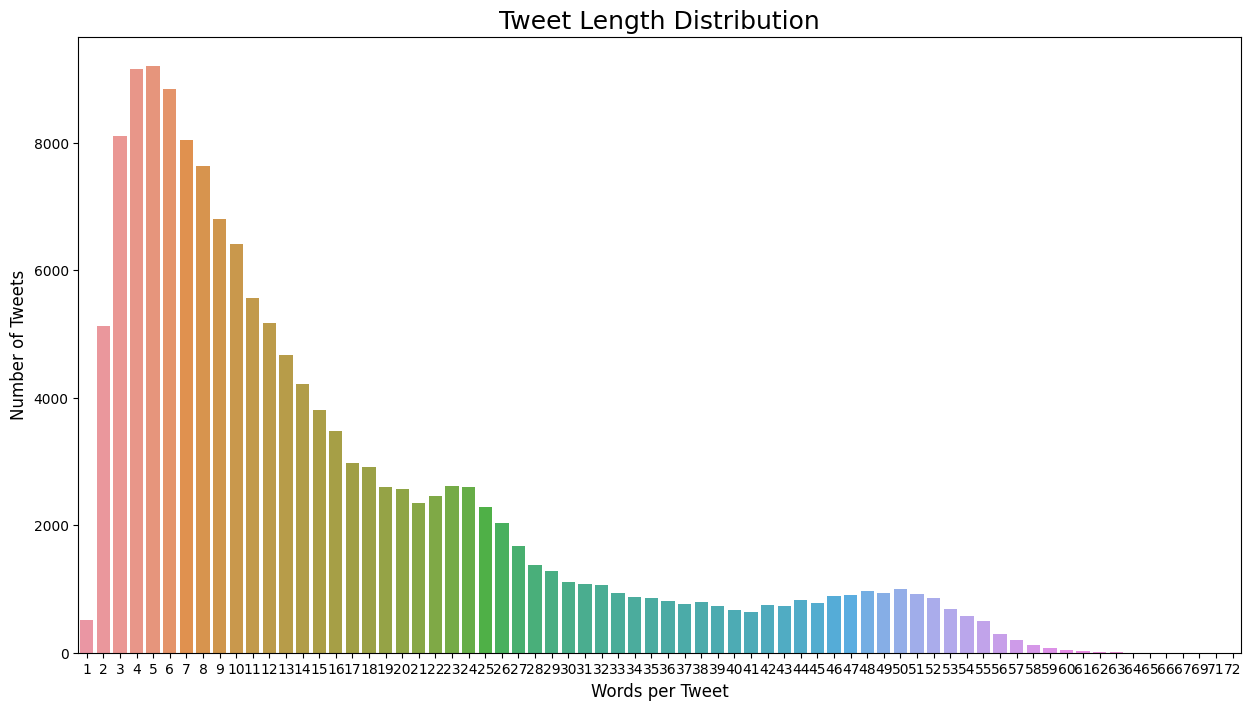

In [5]:
tweet_lengths = [len(tokens.split()) for tokens in df['text']]  # Splitting on spaces to get words

plt.figure(figsize=(15, 8))
sns.countplot(x=tweet_lengths)  # Pass tweet_lengths directly as the x parameter
plt.title('Tweet Length Distribution', fontsize=18)
plt.xlabel('Words per Tweet', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.show()

In [8]:
# Print the most frequent words (unfiltered/preprocessed)

flat_words = [word for tokens in df['text'] for word in tokens.split()]
word_freq = FreqDist(flat_words)
print("Top 50 words in the tweets")
word_freq.most_common(50)

Top 50 words in the tweets


[('לא', 47162),
 ('את', 46402),
 ('של', 29118),
 ('זה', 27748),
 ('על', 25308),
 ('מה', 14799),
 ('אני', 12831),
 ('כל', 12280),
 ('עם', 12194),
 ('אתה', 11380),
 ('הוא', 11019),
 ('גם', 9517),
 ('יש', 9476),
 ('אבל', 9119),
 ('אם', 8489),
 ('היא', 7618),
 ('רק', 7560),
 ('אין', 7261),
 ('הם', 6866),
 ('לי', 6785),
 ('-', 6548),
 ('RT', 6545),
 ('לך', 6486),
 ('היה', 6203),
 ('או', 6197),
 ('מי', 6056),
 ('יותר', 5819),
 ('כי', 5519),
 ('אז', 5327),
 ('שלא', 5236),
 ('כמו', 5085),
 ('ישראל', 4787),
 ('עוד', 4779),
 ('ולא', 4746),
 ('כבר', 4292),
 ('אחד', 4198),
 ('למה', 4021),
 ('כמה', 3907),
 ('צריך', 3872),
 ('איך', 3684),
 ('שלך', 3608),
 ('להיות', 3557),
 ('הזה', 3456),
 ('שהוא', 3263),
 ('אחרי', 3173),
 ('אנחנו', 3170),
 ('טוב', 3163),
 ('לו', 3160),
 ('עד', 3125),
 ('לנו', 3100)]

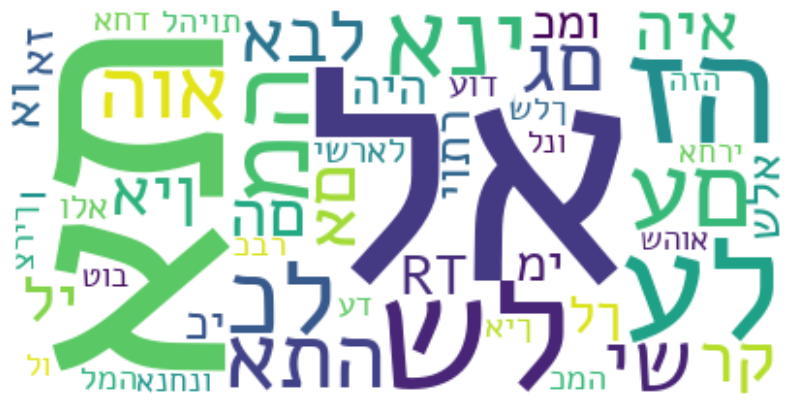

In [21]:
# Display the top 50 most common words in a wordcloud

most_common_count = [x[1] for x in word_freq.most_common(50)]
most_common_word = [x[0] for x in word_freq.most_common(50)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

#Create Word Cloud of top 30 words
wordcloud = WordCloud( background_color = 'white', font_path='data/Alef-Regular.ttf')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()